In [186]:
#Preparamos los paquetes a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import re
import os

In [187]:
#Definimos la fuente del archivo (indicar directorio local)
source = "C:/Users/bruno/Documents/DS/ds_blend_students_2020/TP1/properati.csv"
data = pd.read_csv(source)
data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [188]:
#Analizamos las columnas
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [189]:
#Generamos las expresiones para ubicar los valores numéricos separados por puntos o comas que se posicionen cercanos a las palabras que comienzan con "exp", 
#para evitar obtener valores numéricos que representen otra cosa
regex = r"exp\w*\.?\s?\w*\s*(?:\d\/\d{2,4})?\w+?\s*\w*\s*\w*\s*\$?\s*(\b\d?\d\.?\,?\d[^1]\d\b)|\$?\s*(\b\d?\d\.?\,?\d[^1]\d\b)\s*\w*\s*\w*\s*exp\w"
pattern = re.compile(regex,re.IGNORECASE)
#Segunda expresión para limpiar los valores con terminación m2 o x que se capturaron a pesar de la expresión anterior
reg_num = r"(\d?\d\.?\,?\d{2,3})[^m2|x]"
pattern_num = re.compile(reg_num,re.IGNORECASE)

In [190]:
#Probamos la expresión en un registro con contenido buscado
print(pattern.search(data.description[114]))

<re.Match object; span=(177, 193), match='expensas $ 2.890'>


In [191]:
#Verificamos el texto del caso anterior
print(data.description[114])

buen dpto. de 3 ambientes frente a la plaza. Living comedor pisos de piedra laja, con balcon, toil, cocina con lavadero, 2 dormitorios con piso flotante, baÃ±o completo.cochera.expensas $ 2.890.-


In [192]:
#Generamos una serie con el valor obtenido
recuperados = data["description"].apply(lambda x: None if x is np.NaN else str(x))
recuperados = recuperados.apply(lambda x: None if x is np.NaN else (pattern.search(str(x))))
recuperados = recuperados.apply(lambda x: None if x is None else x.group(1))
recuperados

0         None
1         None
2         None
3         None
4         None
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: description, Length: 121220, dtype: object

In [193]:
#Limpiamos los valores obtenidos quitándoles el punto, coma, signo $ y espacios que pudieran tener
recuperados_limp = recuperados.apply(lambda x: None if x is None else x.replace(" ","").replace(".","").replace("$","").replace("(","").replace(",",""))
recuperados_limp = recuperados_limp.apply(lambda x: None if x is np.NaN else (None if x is None else pattern_num.search(str(x))))
recuperados_limp = recuperados_limp.apply(lambda x: None if x is None else x.group(0))
recuperados_limp.unique()

array([None, '6500', '1350', '2890', '2400', '2600', '3700', '2800',
       '6000', '7500', '2300', '1250', '4800', '5500', '2900', '3600',
       '2000', '1000', '12000', '2050', '20000', '4000', '5000', '1700',
       '4500', '2500', '1600', '1500', '1400', '4200', '6350', '3950',
       '15000', '6700', '14000', '10000', '10500', '7200', '4900', '2200',
       '3390', '3000', '8300', '3900', '1300', '3500', '1200', '1100',
       '8500', '3100', '3050', '13000', '1230', '7100', '1800', '3200',
       '2540', '2250', '18000', '7600', '7400', '1900', '4700', '2700',
       '3850', '8200', '3800', '3150', '1450', '4953', '16000', '8000',
       '3400', '7000', '1578', '2100', '11000', '5100', '6600', '5900',
       '5843', '80000', '1530', '1050', '3250', '6400', '2108', '1320',
       '5400', '4400', '5800', '1441', '4271', '2084', '9500', '5200',
       '11500', '7900', '4300', '17000', '2370', '2066', '6200', '9600',
       '24000', '24240', '9000', '1850', '6800', '4600', '4100', '

In [194]:
#Verificamos los valores que obtuvimos
recuperados_limp.value_counts()

1500     147
2000     127
1000     120
3000     106
4500     102
        ... 
10100      1
35000      1
2880       1
2363       1
27000      1
Name: description, Length: 337, dtype: int64

In [195]:
print ("Porcentaje de valores a recuperar del total:", round(recuperados_limp.value_counts().sum() / len(data.expenses),2)*100,"%")

Porcentaje de valores a recuperar del total: 2.0 %


In [196]:
#Reducimos el denominador pensando solo en los departamentos
len(data.expenses[data.property_type=="apartment"])

71065

In [197]:
print ("Porcentaje de valores a recuperar entre departamentos:", round(recuperados_limp.value_counts().sum() / len(data.expenses[data.property_type=="apartment"]),2)*100,"%")
print()
print("La cantidad de registros a recuperar desde la descripción es bajo respecto a la cantidad de departamentos")

Porcentaje de valores a recuperar entre departamentos: 4.0 %

La cantidad de registros a recuperar desde la descripción es bajo respecto a la cantidad de departamentos


In [198]:
#Verifico individualmente los distitos tipos de caso con valores raros (introducimos el caracter que nos llama la atención, y que no debería estar)
df = pd.DataFrame(data=recuperados_limp,index=recuperados_limp.index)
df[df.description == "/"]

,description


In [199]:
#Imprimimos el texto para ver de qué valor se trata
print(data.description[12807])

Corredor Responsable: Daniel Acosta - CUCICBA 2406Contacto: Alejandro Trajtenberg - MLS ID # 420151055-944 Amb Luminoso mas dependencia de 90 metros ( 83 cubiertos y 7 de balcon corrido). Apto profesional. Cochera Cubierta y Baulera. Expensas al 10/3/17 5.700 pesos.  DANIEL ACOSTA CUCICBA 2406 / CSI 5953"En cumplimiento de la Ley 2340 CUCICBA, Ley 10.973 de la Prov.Bs.As., Ley Nacional 25.028, Ley 22.802 de Lealtad Comercial, Ley 24.240 de Defensa al Consumidor, las normas del Código Civil y Comercial de la Nación y Constitucionales, los agentes NO ejercen el corretaje inmobiliario. Todas las operaciones inmobiliarias son objeto de intermediacion y conclusión por parte de los martilleros y corredores colegiados, cuyos datos se exhiben debajo del nombre de la inmobiliaria.


In [200]:
print(type(recuperados_limp[114]))
#Verificamos que como los datos son de tipo string, los pasamos a integer

<class 'str'>


In [201]:
#Se modifica y verifica
recuperados_limp_int = recuperados_limp.apply(lambda x: None if x is None else int(x)).astype('Int64')
type(recuperados_limp_int.iloc[114])

numpy.int64

In [202]:
#Se identifican los datos de valores elevados (superiores a $40000)
recuperados_limp_int[recuperados_limp_int > 40000]
#data.description[43228]
#data.description[10959]
#data.description[60359]

10959     80000
43228     85000
60359     84200
119837    48000
Name: description, dtype: Int64

In [203]:
#Se identifican los datos de valores elevados (menores a $500)
recuperados_limp_int[recuperados_limp_int < 500]
#data.description[46365]

46365    191
Name: description, dtype: Int64

In [204]:
#Se limpian los datos de valores elevados que no corresponden (superiores a $40000)
recuperados_limp_int[46365] = None

In [205]:
#Creamos una serie solo con los valores numéricos para graficar y analizar
recuperados_limp_int_num = pd.Series(recuperados_limp_int[recuperados_limp_int.values != None].values)
recuperados_limp_int_num.sample(10)

1520     1300
680      2500
2055    11000
385      3500
558      1900
1204     1100
2168     3000
1283     1200
139     14000
1136     8500
dtype: Int64

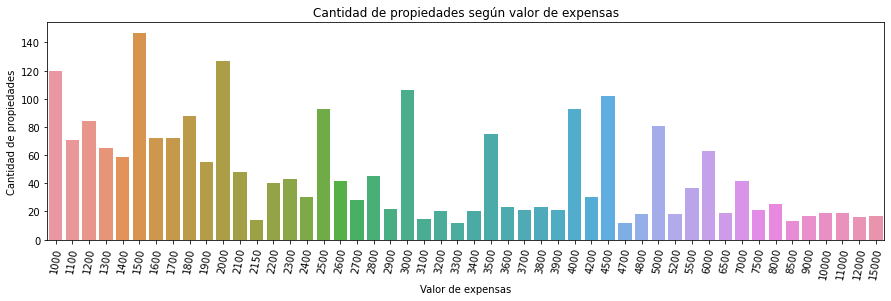

In [206]:
#Pequeño gráfico verificando valores de expensas para los casos del top 50 cantidad de registros
    #Definimos una variable y con los 20 casos de más cantidad de registros con valores de expensas
y = recuperados_limp_int_num.value_counts()[recuperados_limp_int_num.value_counts()>10].nlargest(50)
plt.figure(figsize=(15,4))
sns.barplot(y.index,y)
#df.sort_values('Salary',ascending = False).Education)
plt.xticks(rotation=80)
plt.xlabel("Valor de expensas")
plt.ylabel("Cantidad de propiedades")
plt.title("Cantidad de propiedades según valor de expensas");

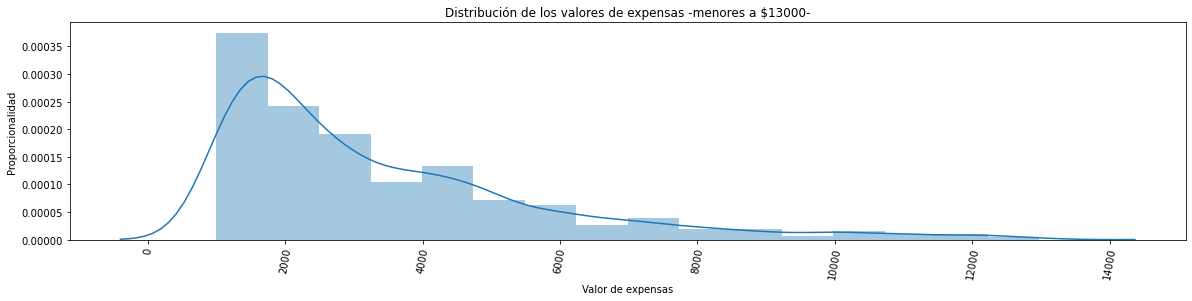

In [207]:
#Pequeño gráfico verificando la distribución de los valores de expensas
    #Definimos una variable para considerar las propiedades con expensas menores a $13000
a = recuperados_limp_int_num[recuperados_limp_int_num<13000]
plt.figure(figsize=(20,4))
sns.distplot(a,bins=16)
plt.xticks(rotation=80)
plt.xlabel("Valor de expensas")
plt.ylabel("Proporcionalidad")
plt.title("Distribución de los valores de expensas -menores a $13000-");

In [208]:
#Sumamos la serie al dataset
data["expenses 2"] = recuperados_limp_int_num

In [209]:
#Comparamos el resultado de la propiedad con el id 114 que antes no tenía y recuperamos el dato
data[["expenses","expenses 2"]].iloc[114]

expenses       NaN
expenses 2    4500
Name: 114, dtype: object

In [210]:
#Convertimos los datos originales al mismo tipo que el que recuperamos
data["expenses"] = data["expenses"].astype('Int64')

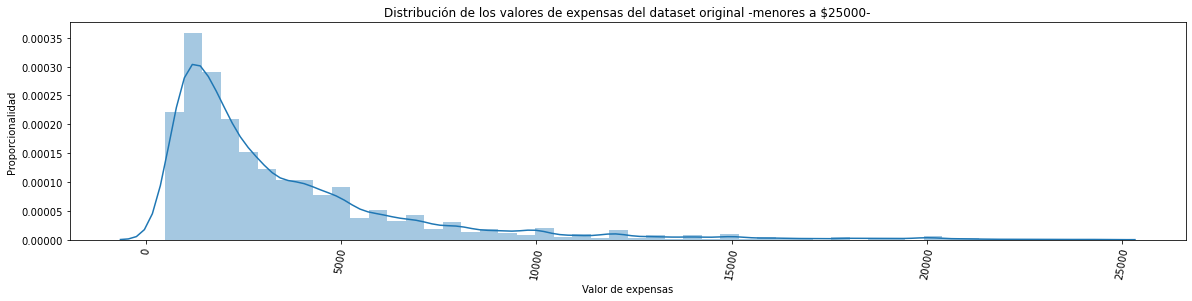

In [211]:
#Pequeño gráfico verificando la distribución de los valores de expensas
    #Definimos una variable para considerar las propiedades con expensas menores a $13000
a2 = a2 = data.expenses[data.expenses.values != None]
a2 = a2[a2>500]
a2 = a2[a2<25000]
plt.figure(figsize=(20,4))
sns.distplot(a2)
plt.xticks(rotation=80)
plt.xlabel("Valor de expensas")
plt.ylabel("Proporcionalidad")
plt.title("Distribución de los valores de expensas del dataset original -menores a $25000-");

In [178]:
#Generamos una máscara para filtrar los ids de registros con expensas entre $500 y $25000
mask_exp_index = data["expenses"][data.expenses.values != None]
mask_exp_index = mask_exp_index[mask_exp_index>500]
mask_exp_index = mask_exp_index[mask_exp_index<25000]
mask_exp_index = mask_exp_index.index

In [213]:
##Generamos una máscara para filtrar los ids de registros con precios por m2 entre $300 y $15000
mask_pricem2_index = data["price_usd_per_m2"][data.price_usd_per_m2.values != None]
mask_pricem2_index = mask_pricem2_index[mask_pricem2_index>300]
mask_pricem2_index = mask_pricem2_index[mask_pricem2_index<15000]
mask_pricem2_index = mask_pricem2_index.index

In [279]:
#Generamos el nuevo df aplicando los filtros
df = data.iloc[mask_pricem2_index & mask_exp_index]
df = df[["Unnamed: 0","price_usd_per_m2","expenses","property_type","floor","expenses 2"]]
df.head(10)

,Unnamed: 0,price_usd_per_m2,expenses,property_type,floor,expenses 2
66,66,1918.421053,1200,apartment,NaN,6350
96,96,720.000000,800,apartment,3.0,4500
98,98,2198.000000,1577,apartment,NaN,4500
131,131,2062.500000,1000,house,NaN,4500
266,266,2872.340426,1800,apartment,NaN,2000
272,272,2166.666667,1000,apartment,NaN,1578
274,274,2608.695652,1000,apartment,NaN,2100
276,276,2000.000000,1700,apartment,NaN,6000
423,423,1504.373368,2185,apartment,NaN,17000
432,432,347.014925,5000,house,NaN,1700


Text(0.5, 1.0, 'Valor de Expensas vs Precio por m2 en dólares')

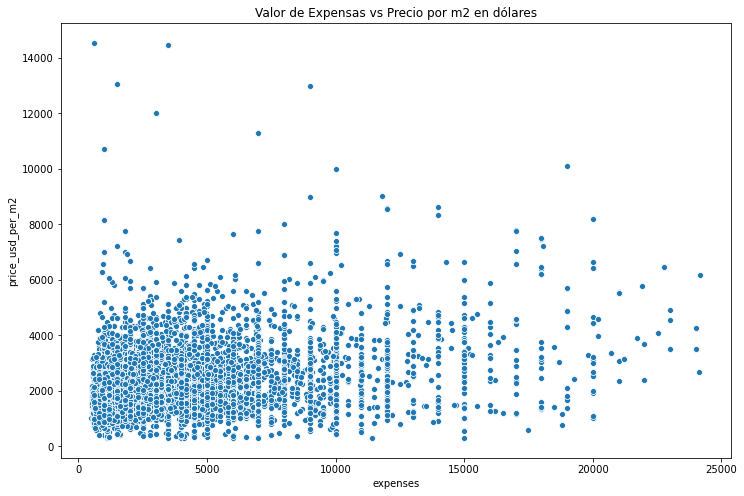

In [236]:
#Generamos un scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='expenses', y='price_usd_per_m2')
plt.title("Valor de Expensas vs Precio por m2 en dólares")

In [228]:
#Reducimos el dataframe aun más para eliminar los valores considerados extremos al fin del gráfico jointplot
df_red =  df[df.expenses<13000]
df_red =  df_red[df.price_usd_per_m2 <5000]
df_red

C:\Users\bruno\anaconda3\envs\dhdsblend37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,price_usd_per_m2,expenses,property_type,floor
66,1918.421053,1200,apartment,NaN
96,720.000000,800,apartment,3.0
98,2198.000000,1577,apartment,NaN
131,2062.500000,1000,house,NaN
266,2872.340426,1800,apartment,NaN
...,...,...,...,...
121141,1519.337017,7000,house,NaN
121146,3684.210526,6246,apartment,NaN
121160,2611.464968,6300,apartment,NaN
121209,2611.464968,6300,apartment,NaN


<Figure size 864x576 with 0 Axes>

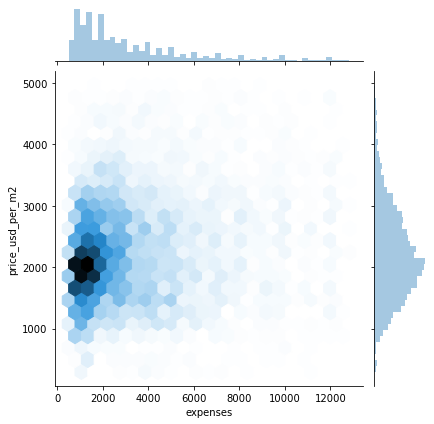

In [240]:
#Generamos un jointplot
plt.figure(figsize=(12,8))
sns.jointplot(x='expenses', y='price_usd_per_m2', data=df_red, kind='hex', 
              gridsize=22)